# Lab 3 - Logistic Regression

## PART 1: Unregularized Logistic Regression ##

**Objectives**: Implement Unregularized Logistic Regression and get to see it works on data. 

**Problem:** Build a Logistic Regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for Logistic Regression. For each training example, you have the applicant's scores on two exams and the admissions decision. 

Your task is to build a classification model that estimates an applicant's probability of admission based on the scores from those two exams.


In [74]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

The file *ex2data1.txt* contains the dataset for this problem. The 1st and the 2nd columns are the scores from the exams (X), the 3rd column (y) indicates if the student was admitted (1) or not admitted (0). 

Load data, using function pd.read_csv from panda library. 
Extract X (the features) and y (the labels). 

In [75]:
data=pd.read_csv("./ex2data1.txt", header=None)

#create column names
data.columns = ["exame1", "exame2", "class"]

data_n=data.values #extract only the values from data frame 

X= data.iloc[:, :2].values
y= data.iloc[:, 2:].values
m = y.shape[0]
y = y.reshape(m,1)
print(y.shape, y[0])
print(X.shape, X[0])
X = X.reshape(m,2)


(100, 1) [0]
(100, 2) [34.62365962 78.02469282]


In [76]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [77]:
#a few examples from the dataset 
data.head()

,exame1,exame2,class
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [78]:
data.describe()

#data.info

,exame1,exame2,class
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [79]:
X

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

### Plot Data
Create a scatter plot of data similar to Fig.1 (using plt.scatter). Students with higher test score for both exam were admitted into the university as expected.

<img src="images/f1.png" style="width:350px;height:250px;">
<caption><center> **Fig. 1** : **file ex2data1.txt** </center></caption>


Text(0, 0.5, 'Exam 2 Score')

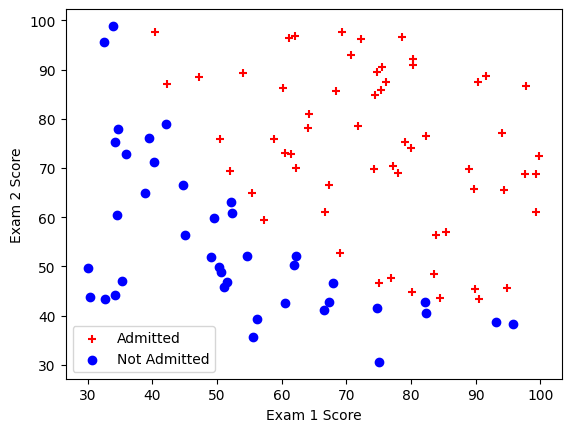

In [80]:
pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="b",marker="o")
plt.legend(["Admitted", "Not Admitted"],loc=3)
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")

### Sigmoid function

Complete *sigmoid* function that computes $ g(z) = \frac{1}{(1+e^{-z})}$. 


In [81]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    gz=1/(1+np.exp(-z))
    
    return gz

In [82]:
# Test the sigmoid function for z=0 => ANSWER =0.5 
sigmoid(0)

0.5

### Compute the Cost Function and Gradient

Recall that the Logistic Regression model is defined as:    $h_{\theta}(x^{(i)})=  \frac{1}{1+e^{-\theta (x^{(i)})}}$

The cost function in Logistic Regression is: $J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$

The gradient of $J(\theta)$ is a vector of the same length as $\theta$  where the jth element (for j = 0, 1,…. n) is defined as:
$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

Complete function *costFunction* to return $J(\theta)$ and the gradient ((partial derivative of $J(\theta)$ with respect to each $\theta$) for logistic regression. 


In [83]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    #number of training examples 
    m=len(y)
    
    #vector of the model predictions for all training examples   
    h = sigmoid(np.dot(X,theta))
         
    error = (-y * np.log(h)) - ((1-y)*np.log(1-h))

    #cost function
    cost = 1/m * sum(error)
       
    #vector of gradients of all model parameters theta   
    grad = 1/m * np.dot(X.transpose(),(h - y))
    
    return cost[0] , grad


### Feature normalization
Apply the same normalization as in Lab 2 (PART 2 Multivariable Linear Regression). 

In [84]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean= np.mean(X)
    std= np.std(X)
    
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

In [85]:
#Run featureNormalization to normalize X, store the means and stds.

X, X_mean, X_std = featureNormalization(X)

#After normalizing the features, add an extra column of 1's corresponding to x0 = 1.
X=np.append(np.ones((X.shape[0],1)), X, axis = 1)
n = X.shape[1]

# Inicialize vector theta = 0
initial_theta = np.zeros((n,1))
print(X.shape)
print(initial_theta.shape)
#Run costFunction
cost, grad= costFunction(initial_theta, X, y)

print("Cost of initial theta is",round(cost,3) )   # ANSWER: Cost of initial theta is 0.693
print("Gradient at initial theta (zeros):",grad)  #ANSWER: Gradient at initial theta (zeros): [[-0.1 ] [-0.28122914] [-0.25098615]]

(100, 3)
(3, 1)
Cost of initial theta is 0.693
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28606568]
 [-0.24664251]]


In [86]:
X

array([[ 1.        , -1.65375318,  0.63867086],
       [ 1.        , -1.88282896, -1.16404507],
       [ 1.        , -1.58911527,  0.36810288],
       [ 1.        , -0.30374089,  1.07622077],
       [ 1.        ,  0.69191528,  0.4970977 ],
       [ 1.        , -1.10128063, -0.50795338],
       [ 1.        , -0.25493217,  1.61513221],
       [ 1.        ,  0.48021493, -1.02359698],
       [ 1.        ,  0.53694533,  1.13495707],
       [ 1.        ,  0.9771454 , -1.18314485],
       [ 1.        ,  1.58080631, -1.46351723],
       [ 1.        ,  0.47962931, -1.8661088 ],
       [ 1.        ,  0.86486332,  0.55718455],
       [ 1.        ,  0.18124787,  1.67889949],
       [ 1.        , -1.3941619 ,  0.53367179],
       [ 1.        , -0.63183216,  1.22933405],
       [ 1.        ,  0.16569542, -0.696831  ],
       [ 1.        ,  0.1063638 , -1.01701774],
       [ 1.        ,  0.24975067,  1.42581165],
       [ 1.        ,  0.58342639, -0.96961801],
       [ 1.        ,  0.07600163, -1.219

### Gradient Descent
Implement gradient descent in the function *gradientDescent*. 
The gradient descent algorithm is very similar to linear regression. 

The only difference is that the hypothesis is now the sigmoid function:  $h_{\theta}(x)=  \frac{1}{1+e^{-\theta^T x}}$

The loop structure is written, you need to supply the updates for $\theta$  within each iteration.

In [87]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    #number of training examples
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta, X, y)
        theta -= alpha*grad
        J_history.append(cost)
    
    return theta , J_history

In [88]:
# Run gradientDescent with learning rate 0.5 and 400 iterations. 

theta , J_history = gradientDescent(X,y,initial_theta,alpha=0.5,num_iters=400)

print("Theta optimized by gradient descent:",theta)

print("The cost for the optimized theta:",round(J_history[-1],3))  #ANSWER: The cost for the optimized theta: 0.205

Theta optimized by gradient descent: [[1.50808439]
 [3.46586752]
 [3.36778584]]
The cost for the optimized theta: 0.205


### Plot the Cost Function 
Choose 400 iterations. Try different values of the learning  rate = [0.01, 0.1, 0.5, 1]
and get plots similar to Fig. 2. 

<img src="images/f6.png" style="width:350px;height:250px;">
<caption><center> **Fig. 2** : **Cost function evolution for varying learning rates ** </center></caption>

Text(0.5, 0, 'Iteration')

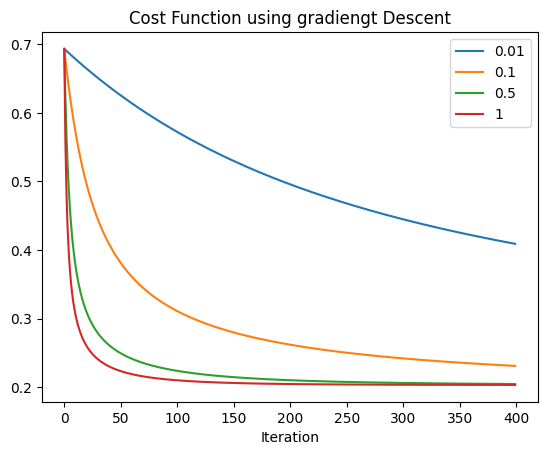

In [89]:
lr=[0.01, 0.1, 0.5, 1]
for i in lr:
    initial_theta = np.zeros((n,1))
    theta , J_history = gradientDescent(X,y,initial_theta,alpha=i,num_iters=400)
    plt.plot(J_history)
plt.legend(lr)
plt.title("Cost Function using gradiengt Descent")
plt.xlabel("Iteration")

### Plotting the decision boundary
   
Our model is sigmoid function:  $h_{\theta}(x)=  \frac{1}{1+e^{-\theta^T x}}$

If $h_\theta(x) > 0.5$ => predict class "1", that is $\theta^Tx> 0$ => predict class "1"

If $h_\theta(x) < 0.5$ => predict class "0", that is $\theta^Tx< 0$ => predict class "0" 

$\theta^Tx = 0$  is the decision boundary. 

In this particular case $\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$ is the decision boundary-   

Since, we plot $x_1$ against $x_2$, the boundary line will be the equation $ x_2 = \frac{-(\theta_0+\theta_1x_1)}{\theta_2}$

Plot the data and the decision boundary. You should get a figure similar to Fig.3.

<img src="images/f2.png" style="width:350px;height:250px;">
<caption><center> **Fig. 3** : **Training data vs Decision boundary** </center></caption>

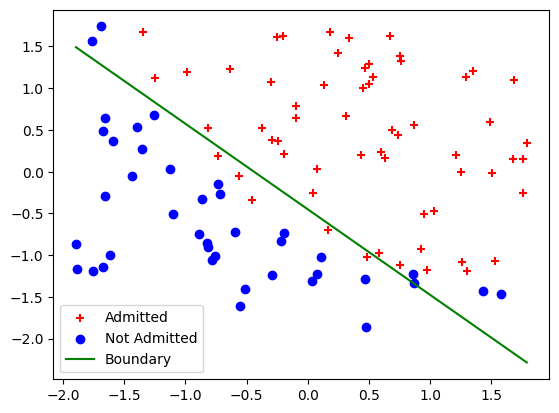

In [90]:
#Create Fig.3 (using plt.scatter) , see Fig.1 
pos=(y==1)
neg=(y==0)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="o")

#Sugestion how to plot the decision boundary (the green line)
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.legend(["Admitted", "Not Admitted", "Boundary"],loc=3)


### Prediction

For a student with Exam1 score of 45 and Exam2 score of 85, use the learned model to compute what is the admission probability of this student. The answer is around 77% probability (0.767). 

In [91]:
x_test = np.array([45,85])
#Normalize the values
x_test = (x_test - X_mean)/X_std
#Add one
x_test = np.append(np.ones(1),x_test)

#Compute the prediction (the probability for admission)
z=np.dot(x_test,theta)
prob = sigmoid(z)

print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7676259390522888


### Accuracy on training set 

Evaluate how well the learned model predicts on the training set. 

Your task is to complete the function *classifierPredict*. 

The *classifierPredict* function returns a boolean array with True if the probability of admission into university is more than 0.5 and False otherwise. Taking the sum(p==y) adds up all instances where it correctly predicts the given y values (the labels).

In [92]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    z = np.dot(X, theta)
    
    return z>0

In [93]:
# Call classifierPredict
p= classifierPredict(theta,X)

print("Train Accuracy:", sum(p==y)[0],"%")  #ANSWER: Train Accuracy: 89 %

Train Accuracy: 89 %


## sklearn library to solve the same problem 

In [94]:
from sklearn.linear_model import LogisticRegression

logitN = LogisticRegression()
Xnorm, X_mean, X_std = featureNormalization(X)
logitN.fit(Xnorm,y)
print('Accuracy of log reg classifier')
print(logitN.score(Xnorm, y))

Accuracy of log reg classifier
0.89


/Users/joaoantonio/.pyenv/versions/3.10.6/envs/env_ml/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi